# 평가

- 머신러닝:데이터 가공/변환->모델 학습/예측->평가
- 성능 평가 지표는 회귀/분류 모델에 따라 달라짐
- 회귀: 실제값-예측값의 오차 평균값
- 분류: 정확도, 오차행렬, 정밀도, 재현율, F1 스코어, ROC AUC

## 정확도

> 예측 결과가 동일한 데이터 건수/ 전체 예측 데이터 건수
: 이진 데이터 분류의 경우 데이터 구성에 따라 ML모델 성능을 왜곡할 수 있음
 -> 단순한 알고리즘의 예측을 하더라도 꽤 높은 정확도가 나올 수 있음
 -> 불균형한 레이블값 분포에서 성능을 판단할 때 적합하지 않음
 
## 오차행렬

> TrueNegative / TruePositive / FalseNegative / FalsePositive 
>> 4가지로 실제 레이블클래스/ 예측 레이블 클래스가 매핑되는지 나타냄
>> 정확도= (TN+TP)/(TN+TP+FN+FP)
: 불균형한 레이블값 분포에서 성능을 판단할 때 적합하지 않음

## 정밀도

> =TP/(FP+TP)
>> 예측을 positive로 한 대상 중에서 예측과 실제 값이 positive인 비율
: 양성 예측도 라고도 함
: 실제 negative인 데이터 예측을 positive로 잘못 판단하ㅔ 되면 큰 문제가 되는 경우 중요 지표
: ex) 스팸 메일 분류할 때

## 재현율

> =TP/(FN+TP)
>> 실제 값이 positive인 대상 중에서 예측과 실제 값이 positive인 비율
: 민감도, True Positive Rate 라고도 함
: 실제 positive 양성 데이터를 negative로 잘못 판단하게 되면 큰 문제가 되는 경우 중요한 지표
: ex) 암판단모델, 보험 사기, 금융 사기 적발


### 정밀도/재현율 TRADE-OFF

> 임곗값을 사용해 재현율 높이기

## F1 SCORE

> 정밀도와 재현율을 결합한 지표

## ROC곡선과 AUC

> 수신자 판단 곡선, 이진분류의 예측 성능 측정에서 중요한 지표

- ROC곡선: False Positive rate이 변할 때 True Positive rate(재현율)이 어떻게 변하는지 나타내는 곡선
- 민감도: True Negative rate: 실제값 positive가 정확히 예측해야 하는 수준
- 특이성: Specificity: 실제값 negative가 정확히 예측해야 하는 수준



In [1]:
from sklearn.base import BaseEstimator
class MyDummyClassifier(BaseEstimator):
    #fit()에서 아무것도 학습하지 않음
    def fit(self,X,y=None):
        pass
    #predict()에서 sex=1이면 0 아님 1로 예측
    def predict(self,X):
        pred=np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
        return pred

In [2]:
## 필요한 함수들

from sklearn.preprocessing import LabelEncoder
#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df=pd.read_csv('C:/Users/MYCOM/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
x_titanic_df=titanic_df.drop('Survived',axis=1)
x_titanic_df=transform_features(x_titanic_df)
x_train,x_test,y_train,y_test=train_test_split(x_titanic_df,y_titanic_df,test_size=0.2,random_state=0)
myclf=MyDummyClassifier()
myclf.fit(x_train,y_train)
mypredictions=myclf.predict(x_test)
print('Dummy Clasifier의 정확도:{0:.4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Clasifier의 정확도:0.7877


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,x,y):
        pass
    # 입력값으로 들어오는 x 데이터 세트의 크기만큼 모두 0으로 만들어서 반환
    def predict(self,x,y):
        return np.zeros((len(x),1),dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits=load_digits()

# digits 번호가 7이면 true, 이를 astype(int)로 1로 변환, 7이 아님 false이고 0으로
y=(digits.target==7).astype(int)
x_train,x_test,y_train,y_test=train_test_split(digits.data,y,random_state=11)

# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf=MyFakeClassifier()
fakeclf.fit(x_train,y_train)
fakepred=fakeclf.predict(x_test,y_test)
print('모든 예측을 0으로 하여도 정확도는 {0:.4f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 0.9000


In [5]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,fakepred)


array([[405,   0],
       [ 45,   0]], dtype=int64)

In [13]:
## 정밀도, 재현율

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{0:.4f}, 재현율:{2:.4f}'.format(accuracy,precision,recall))
    
    

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터와 테스트 데이터로 분할
titanic_df=pd.read_csv('C:/Users/MYCOM/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
x_titanic_df=titanic_df.drop('Survived',axis=1)
x_titanic_df=transform_features(x_titanic_df)

x_train,x_test,y_train,y_test=train_test_split(x_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)
get_clf_eval(y_test,pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.8492, 재현율:0.7869


C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
pred_proba=lr_clf.predict_proba(x_test)
pred=lr_clf.predict(x_test)
print('pred_proba()결과 shape:{0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출:',pred_proba[:3])

#예측 확률 array와 예측 결과값 array를 병합해 예측 확률과 결과값을 한눈에 확인
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 shape:(179, 2)
pred_proba array에서 앞 3개만 샘플로 추출: [[0.46167981 0.53832019]
 [0.87859948 0.12140052]
 [0.87725166 0.12274834]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46167981 0.53832019 1.        ]
 [0.87859948 0.12140052 0.        ]
 [0.87725166 0.12274834 0.        ]]


In [16]:
# 트레이드 오프

from sklearn.preprocessing import Binarizer
X=[[1,-1,2],[2,0,0],[0,1.1,1.2]]

#X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [17]:
from sklearn.preprocessing import Binarizer
# Binarizer의 threshold 설정값, 분류 설정 임곗값
custom_threshold=0.5
# predict_proba() 반환값의 두번째 칼럼, positive 클래스 칼럼 하나만 추출해 
# Binarizer 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.8492, 재현율:0.7869


In [18]:
# 이 분류 결정 임곗값 낮추기

# Binarizer threshold 설정값을 0.4로 낮추기 원래 0.5
custom_threshold=0.4
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도:0.8380, 정밀도:0.8380, 재현율:0.8361


In [25]:
# 임곗값 증가시키면서 평가 지표 조사
thresohold=[0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test,custom_predict)
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresohold)

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도:0.8380, 정밀도:0.8380, 재현율:0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도:0.8492, 정밀도:0.8492, 재현율:0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.8492, 재현율:0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도:0.8659, 정밀도:0.8659, 재현율:0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8771, 재현율:0.7377


In [28]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때 예측 확률 추출
pred_proba_class1=lr_clf.predict_proba(x_test)[:,1]
#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision recall curve 인자로 입력
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape',thresholds.shape)

#빈환된 임곗값 배열로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index=np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임곗값 배열의 index 10개',thr_index)
print('샘플용 10개의 임곗값',np.round(thresholds[thr_index],2))

print('샘플 임곗값별 정밀도',np.round(precisions[thr_index],3))
print('샘플 임곗값별 재현율',np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape (143,)
샘플 추출을 위한 임곗값 배열의 index 10개 [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값 [0.1  0.12 0.14 0.19 0.28 0.4  0.57 0.67 0.82 0.95]
샘플 임곗값별 정밀도 [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임곗값별 재현율 [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

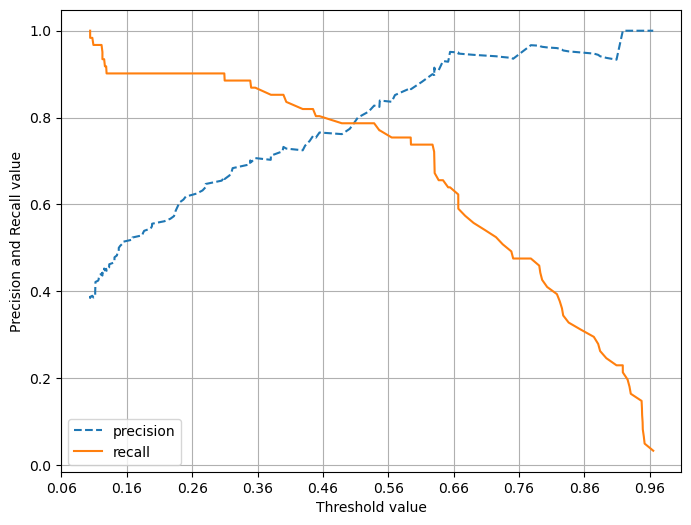

In [36]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(x_test)[:,1])

In [38]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,pred)
print('F1 스코어:{0:.4f}'.format(f1))

F1 스코어:0.7805


In [49]:
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    #F1 스코어 추가
    f1=f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    #F1 score print 추가
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4},F1:{3:.4f}'.format(accuracy,precision,recall,f1))
    
    
thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba=lr_clf.predict_proba(x_test)
#pred_proba[:,1].reshape(-1,1)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차행렬
[[99 19]
 [10 51]]
정확도:0.8380,정밀도:0.7286,재현율:0.8361,F1:0.7786
임곗값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도:0.8492,정밀도:0.7656,재현율:0.8033,F1:0.7840
임곗값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492,정밀도:0.7742,재현율:0.7869,F1:0.7805
임곗값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도:0.8659,정밀도:0.8364,재현율:0.7541,F1:0.7931
임곗값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8771,정밀도:0.8824,재현율:0.7377,F1:0.8036


In [51]:
from sklearn.metrics import roc_curve

#레이블 값이 1일 때 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(x_test)[:,1]

fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)
#반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임계값을 5 스탭으로 추출
#thresholds[0]은 max(예측확률)+1 로 임의 설정됨. 이를 제외하기 위해 np.arange 1로 시작

import numpy as np
thr_index=np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index 10개',thr_index)
print('샘플용 10개의 임계값',np.round(thresholds[thr_index],2))

print('샘플 임곗값별 FPR:',np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:',np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개 [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임계값 [0.97 0.65 0.63 0.57 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임곗값별 TPR: [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


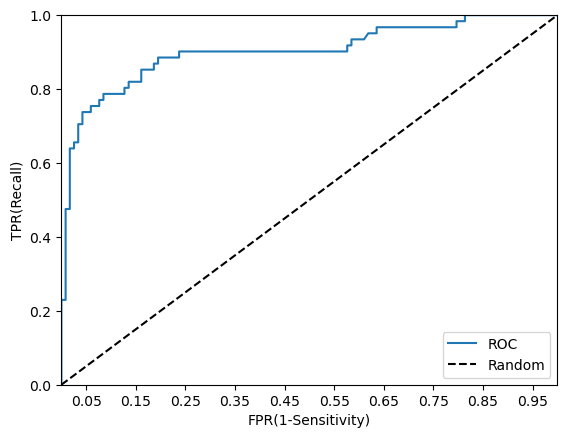

In [52]:
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test,pred_proba[:,1])

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score
import numpy as np
print(confusion_matrix(y_test,pred))

print('정확도:',np.round(accuracy_score(y_test,pred),4))
print('정밀도:',np.round(precision_score(y_test,pred),4))
print('재현율:',np.round(recall_score(y_test,pred),4))

[[104  14]
 [ 13  48]]
정확도: 0.8492
정밀도: 0.7742
재현율: 0.7869
